In [1]:
import pandas as pd
# Load dataset
df = pd.read_csv('bank_transactions.csv')
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [2]:
print("Original DataFrame Shape:", df.shape)
print(df.head())  # Show the first few rows

Original DataFrame Shape: (1048567, 9)
  TransactionID CustomerID CustomerDOB CustGender CustLocation  \
0            T1   C5841053     10/1/94          F   JAMSHEDPUR   
1            T2   C2142763      4/4/57          M      JHAJJAR   
2            T3   C4417068    26/11/96          F       MUMBAI   
3            T4   C5342380     14/9/73          F       MUMBAI   
4            T5   C9031234     24/3/88          F  NAVI MUMBAI   

   CustAccountBalance TransactionDate  TransactionTime  \
0            17819.05          2/8/16           143207   
1             2270.69          2/8/16           141858   
2            17874.44          2/8/16           142712   
3           866503.21          2/8/16           142714   
4             6714.43          2/8/16           181156   

   TransactionAmount (INR)  
0                     25.0  
1                  27999.0  
2                    459.0  
3                   2060.0  
4                   1762.5  


In [3]:
# Check for missing values
print(df.isnull().sum())

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64


In [4]:
# Drop rows where critical transaction columns are missing
df_cleaned = df.dropna(subset=['TransactionID', 'CustomerID', 'TransactionAmount (INR)'])

# Convert CustomerDOB to datetime format
df_cleaned['CustomerDOB'] = pd.to_datetime(df_cleaned['CustomerDOB'], errors='coerce')

# Drop rows where CustomerDOB is NaT (invalid/missing dates)
df_cleaned = df_cleaned[df_cleaned['CustomerDOB'].notna()]

# Drop rows where CustGender, CustLocation, or CustAccountBalance are missing
df_cleaned = df_cleaned[df_cleaned[['CustGender', 'CustLocation', 'CustAccountBalance']].notna().all(axis=1)]

# Print final shape
print("Final Cleaned Shape:", df_cleaned.shape)

# Display sample data
print(df_cleaned.head())

<ipython-input-4-379999cfb317>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['CustomerDOB'] = pd.to_datetime(df_cleaned['CustomerDOB'], errors='coerce')


Final Cleaned Shape: (1041614, 9)
  TransactionID CustomerID CustomerDOB CustGender CustLocation  \
0            T1   C5841053  1994-10-01          F   JAMSHEDPUR   
1            T2   C2142763  2057-04-04          M      JHAJJAR   
2            T3   C4417068  1996-11-26          F       MUMBAI   
3            T4   C5342380  2073-09-14          F       MUMBAI   
4            T5   C9031234  1988-03-24          F  NAVI MUMBAI   

   CustAccountBalance TransactionDate  TransactionTime  \
0            17819.05          2/8/16           143207   
1             2270.69          2/8/16           141858   
2            17874.44          2/8/16           142712   
3           866503.21          2/8/16           142714   
4             6714.43          2/8/16           181156   

   TransactionAmount (INR)  
0                     25.0  
1                  27999.0  
2                    459.0  
3                   2060.0  
4                   1762.5  


In [5]:
# Check for invalid transaction amounts
invalid_transactions = df_cleaned[df_cleaned['TransactionAmount (INR)'] <= 0]
print("Invalid transactions count:", len(invalid_transactions))

Invalid transactions count: 820


In [6]:
# Remove invalid transactions
df_cleaned = df_cleaned[df_cleaned['TransactionAmount (INR)'] > 0]

In [7]:
from datetime import datetime
import pandas as pd

# Ensure a copy to avoid SettingWithCopyWarning
df_cleaned = df_cleaned.copy()

# Convert CustomerDOB to datetime safely
df_cleaned['CustomerDOB'] = pd.to_datetime(df_cleaned['CustomerDOB'], errors='coerce')

# Drop rows with missing DOB
df_cleaned = df_cleaned.dropna(subset=['CustomerDOB'])

# Calculate Age more robustly
current_date = datetime.now()
df_cleaned['age'] = (current_date - df_cleaned['CustomerDOB']).dt.days // 365  # Convert days to years

# Filter only valid age range (18-100)
df_cleaned = df_cleaned[(df_cleaned['age'] >= 18) & (df_cleaned['age'] <= 100)]

# Print final dataset shape
print("Final Cleaned Shape:", df_cleaned.shape)

# Show the first few rows
print(df_cleaned[['CustomerDOB', 'age']].head())


Final Cleaned Shape: (879715, 10)
  CustomerDOB  age
0  1994-10-01   30
2  1996-11-26   28
4  1988-03-24   37
6  1992-01-26   33
7  1982-01-27   43


In [8]:
# Count transactions per location
top_locations = df_cleaned['CustLocation'].value_counts().head(5)

# Display results
print("Top 5 locations with maximum transactions:")
print(top_locations)

Top 5 locations with maximum transactions:
CustLocation
MUMBAI       86277
BANGALORE    70699
NEW DELHI    66172
GURGAON      62746
DELHI        60490
Name: count, dtype: int64


In [9]:
import pandas as pd

# Load Excel file WITHOUT date parsing
df = pd.read_csv("bank_transactions.csv")

# Step 1: Convert TransactionDate manually, try all formats
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce', dayfirst=True)

# Step 2: Check how many dates were parsed successfully
valid_dates = df['TransactionDate'].notna().sum()
print(f"✅ Valid parsed dates: {valid_dates} out of {len(df)}")

# Step 3: Drop rows with bad/missing dates
df = df.dropna(subset=['TransactionDate'])

# Step 4: Set the reference date
reference_date = df['TransactionDate'].max()

# Step 5: Compute RFM metrics
rfm_df = df.groupby('CustomerID').agg({
    'TransactionDate': lambda x: (reference_date - x.max()).days,  # Recency
    'TransactionID': 'count',  # Frequency
    'TransactionAmount (INR)': 'sum'  # Monetary
}).reset_index()

# Step 6: Rename columns
rfm_df.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Step 7: Show the result
print("✅ RFM Data:")
print(rfm_df.head())


<ipython-input-9-522a49dedfc8>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce', dayfirst=True)


✅ Valid parsed dates: 1048567 out of 1048567
✅ RFM Data:
  CustomerID  Recency  Frequency  Monetary
0   C1010011       25          2    5106.0
1   C1010012       68          1    1499.0
2   C1010014       75          2    1455.0
3   C1010018       36          1      30.0
4   C1010024       64          1    5000.0


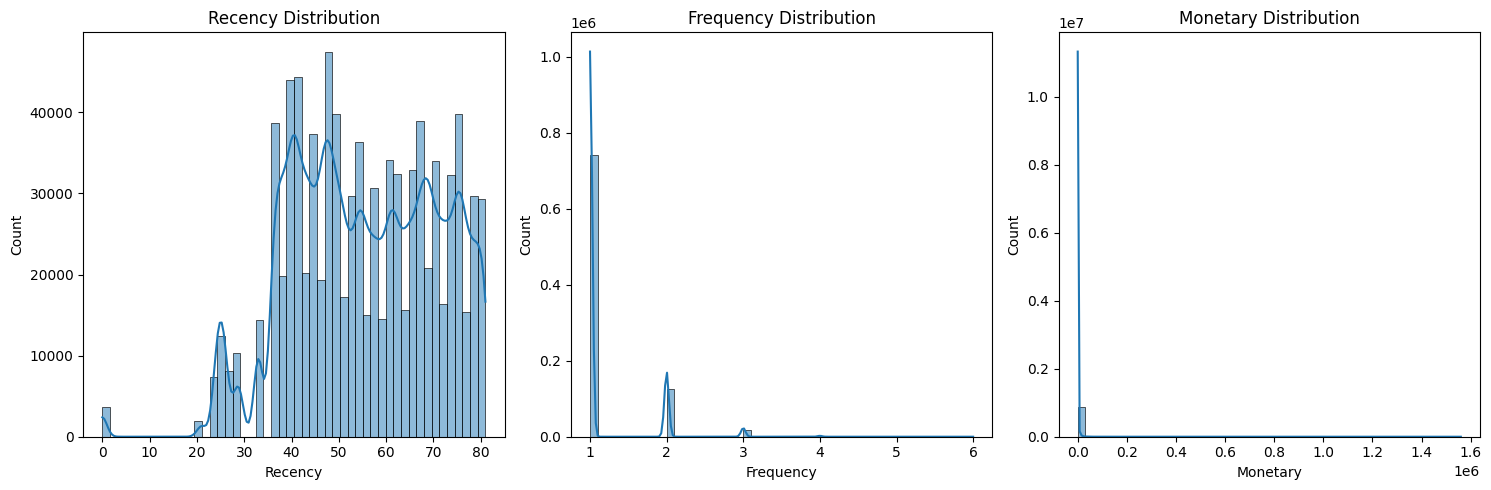

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of RFM values
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(rfm_df['Recency'], bins=50, kde=True, ax=axes[0])
axes[0].set_title("Recency Distribution")

sns.histplot(rfm_df['Frequency'], bins=50, kde=True, ax=axes[1])
axes[1].set_title("Frequency Distribution")

sns.histplot(rfm_df['Monetary'], bins=50, kde=True, ax=axes[2])
axes[2].set_title("Monetary Distribution")

plt.tight_layout()
plt.show()


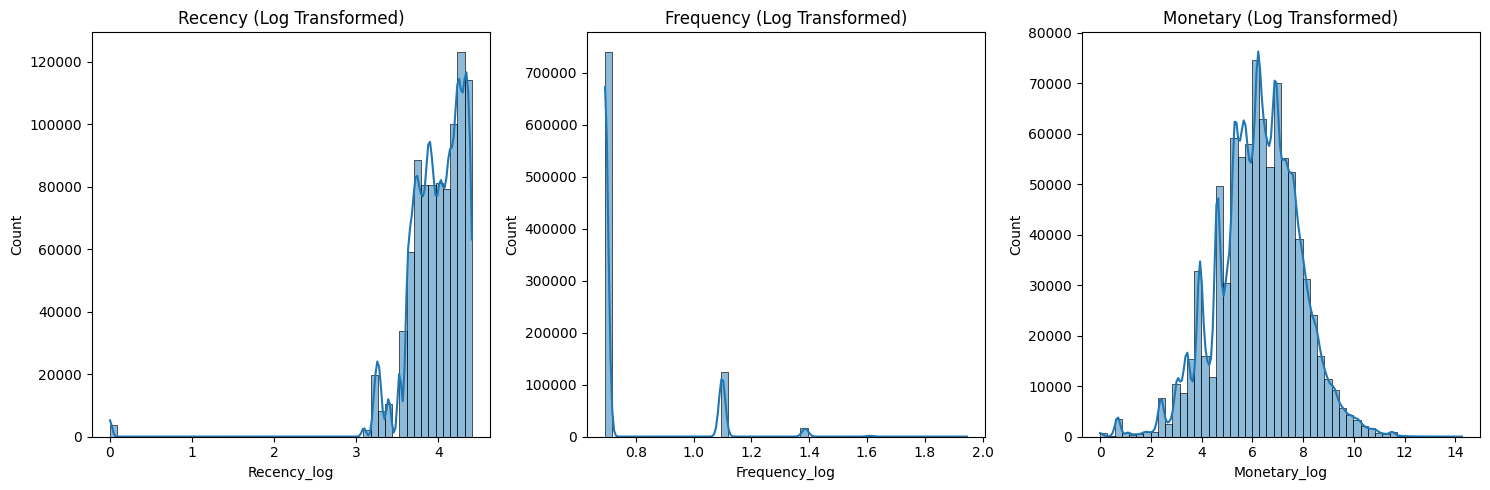

In [11]:
import numpy as np

# Apply log transformation to reduce skewness
rfm_df['Recency_log'] = np.log1p(rfm_df['Recency'])
rfm_df['Frequency_log'] = np.log1p(rfm_df['Frequency'])
rfm_df['Monetary_log'] = np.log1p(rfm_df['Monetary'])

# Plot transformed distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(rfm_df['Recency_log'], bins=50, kde=True, ax=axes[0])
axes[0].set_title("Recency (Log Transformed)")

sns.histplot(rfm_df['Frequency_log'], bins=50, kde=True, ax=axes[1])
axes[1].set_title("Frequency (Log Transformed)")

sns.histplot(rfm_df['Monetary_log'], bins=50, kde=True, ax=axes[2])
axes[2].set_title("Monetary (Log Transformed)")

plt.tight_layout()
plt.show()

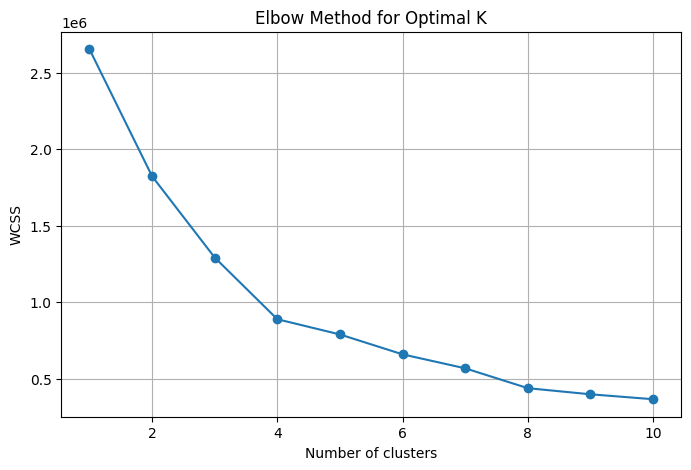

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Only select RFM features, not the index
rfm_features = rfm_df[['Recency', 'Frequency', 'Monetary']]

# Standardize the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

# Elbow method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [13]:
print(rfm_df.head())

  CustomerID  Recency  Frequency  Monetary  Recency_log  Frequency_log  \
0   C1010011       25          2    5106.0     3.258097       1.098612   
1   C1010012       68          1    1499.0     4.234107       0.693147   
2   C1010014       75          2    1455.0     4.330733       1.098612   
3   C1010018       36          1      30.0     3.610918       0.693147   
4   C1010024       64          1    5000.0     4.174387       0.693147   

   Monetary_log  
0      8.538367  
1      7.313220  
2      7.283448  
3      3.433987  
4      8.517393  


In [14]:
# Final K value (replace with your chosen K)
final_k = 4

# Apply KMeans
kmeans = KMeans(n_clusters=final_k, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled)

# View sample of clustered data
print(rfm_df.head())

# Drop non-numeric columns before computing cluster profile
numeric_columns = ['Recency', 'Frequency', 'Monetary']
cluster_profile = rfm_df[numeric_columns + ['Cluster']].groupby('Cluster').mean().round(2)
print("\nCluster Profiles:\n", cluster_profile)

  CustomerID  Recency  Frequency  Monetary  Recency_log  Frequency_log  \
0   C1010011       25          2    5106.0     3.258097       1.098612   
1   C1010012       68          1    1499.0     4.234107       0.693147   
2   C1010014       75          2    1455.0     4.330733       1.098612   
3   C1010018       36          1      30.0     3.610918       0.693147   
4   C1010024       64          1    5000.0     4.174387       0.693147   

   Monetary_log  Cluster  
0      8.538367        1  
1      7.313220        2  
2      7.283448        1  
3      3.433987        0  
4      8.517393        2  

Cluster Profiles:
          Recency  Frequency  Monetary
Cluster                              
0          43.52       1.00   1292.17
1          47.61       2.14   2801.48
2          69.35       1.00   1321.64
3          53.22       1.36  78834.98


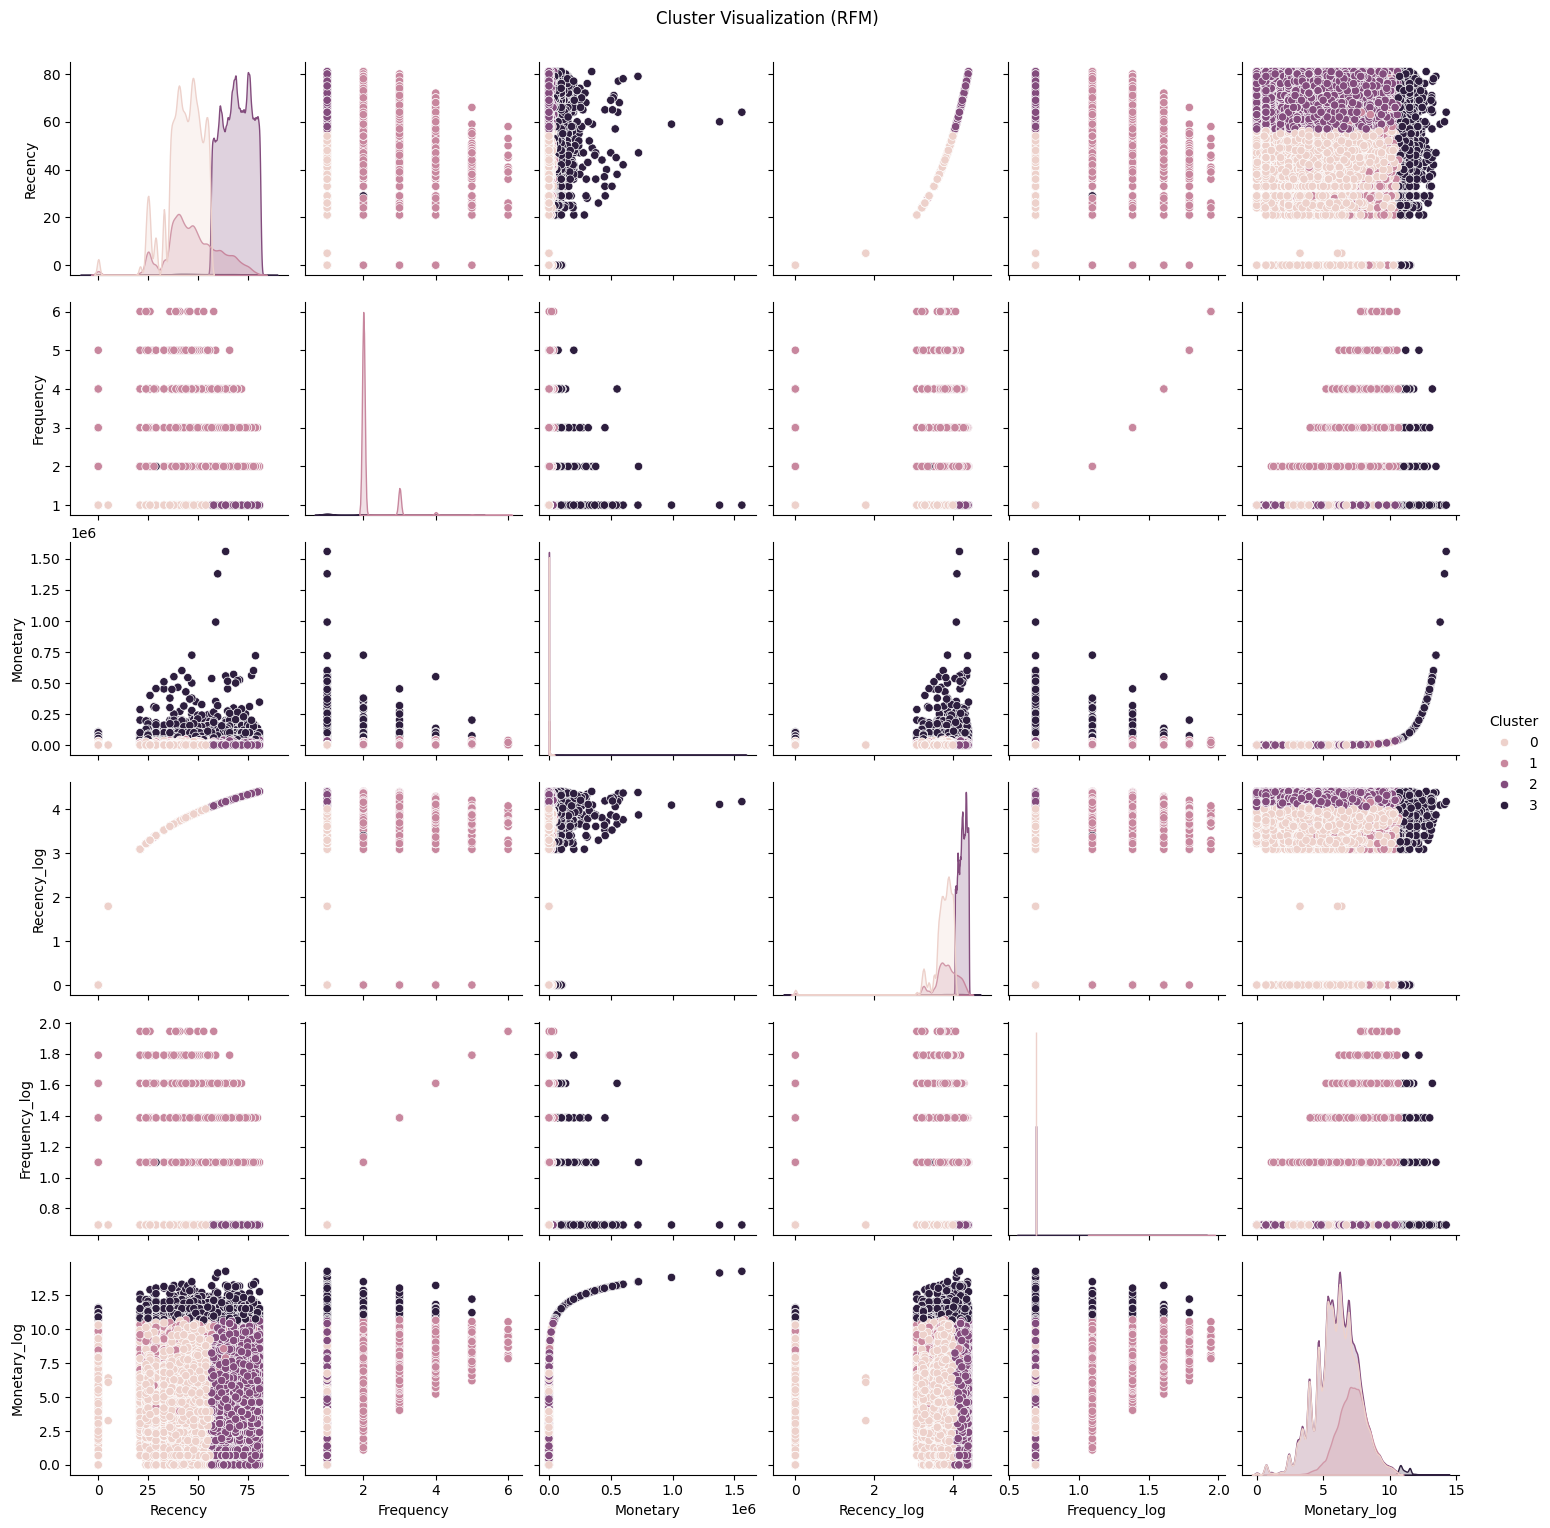

In [15]:
import seaborn as sns

# Add the cluster column to unscaled RFM for better visualization
rfm_with_cluster = rfm_df.copy()
rfm_with_cluster[['Recency', 'Frequency', 'Monetary']] = scaler.inverse_transform(rfm_scaled)

# Pairplot of clusters
sns.pairplot(rfm_with_cluster, hue='Cluster', diag_kind='kde')
plt.suptitle('Cluster Visualization (RFM)', y=1.02)
plt.show()

#sample_df = rfm_with_cluster.sample(frac=0.01, random_state=42)
#sns.pairplot(sample_df, hue='Cluster', diag_kind='kde')
#plt.suptitle('Pairplot of Clusters (1% Sample)', y=1.02)
#plt.show()

In [16]:
df_cleaned.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0,30
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2/8/16,142712,459.0,28
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5,37
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2/8/16,173806,566.0,33
7,T8,C1220223,1982-01-27,M,MUMBAI,95075.54,2/8/16,170537,148.0,43


In [17]:
# Merge original data with clustered RFM to include location
rfm_with_location = rfm_df.merge(df_cleaned[['CustomerID', 'CustLocation']], on='CustomerID', how='left')

# Map business value to cluster IDs (this should be based on your actual cluster profiles)
# Example: Let's say after analysis, cluster 0 = High Value, 1 = Mid, 2 = Low, 3 = Churn Risk
cluster_labels = {
    0: 'High Value',
    1: 'Mid Value',
    2: 'Low Value',
    3: 'Churn Risk'
}

rfm_with_location['Segment'] = rfm_with_location['Cluster'].map(cluster_labels)

# Summarize by Segment and Location
segment_location_summary = rfm_with_location.groupby(['Segment', 'CustLocation']).agg({
    'CustomerID': 'count',
    'Monetary': 'mean',
    'Recency': 'mean',
    'Frequency': 'mean'
}).reset_index().rename(columns={'CustomerID': 'Customer_Count'})

# Display for report
print("Business Value Segments by Location:\n")
print(segment_location_summary.sort_values(by=['Segment', 'Customer_Count'], ascending=[True, False]))

# Optional: Save for inclusion in PDF/Word report
segment_location_summary.to_csv('Segment_Location_Summary.csv', index=False)

Business Value Segments by Location:

          Segment                    CustLocation  Customer_Count  \
235    Churn Risk                          MUMBAI             288   
39     Churn Risk                       BANGALORE             263   
257    Churn Risk                       NEW DELHI             243   
141    Churn Risk                         GURGAON             192   
98     Churn Risk                           DELHI             177   
...           ...                             ...             ...   
16871   Mid Value                       ZADESHWAR               1   
16873   Mid Value                       ZAHIRABAD               1   
16874   Mid Value                       ZIRAKHPUR               1   
16876   Mid Value                         ZIRKPUR               1   
16878   Mid Value  ZOPADPATTI TEHSIL KURLA MUMBAI               1   

           Monetary    Recency  Frequency  
235    72004.376771  50.375000   1.718750  
39     72916.922776  51.901141   1.733840  
2

In [18]:
# Get top 5 locations by total number of transactions
top_locations = df_cleaned['CustLocation'].value_counts().head(5).index.tolist()

# Filter original + cluster-merged dataframe
rfm_top_locations = rfm_with_location[rfm_with_location['CustLocation'].isin(top_locations)]

# Summary of cluster behavior per location
top_location_summary = rfm_top_locations.groupby(['CustLocation', 'Segment']).agg({
    'CustomerID': 'count',
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index().rename(columns={'CustomerID': 'Customer_Count'})

# Sort for readability
top_location_summary.sort_values(by=['CustLocation', 'Customer_Count'], ascending=[True, False], inplace=True)

# Display results
print("Cluster Descriptive Characteristics in Top 5 Locations:\n")
print(top_location_summary)

# Optional: Save for report
top_location_summary.to_csv('Top5_Location_Cluster_Insights.csv', index=False)


Cluster Descriptive Characteristics in Top 5 Locations:

   CustLocation     Segment  Customer_Count    Recency  Frequency  \
2     BANGALORE   Low Value           25932  69.547625   1.000000   
1     BANGALORE  High Value           23789  43.588213   1.000000   
3     BANGALORE   Mid Value           20715  47.597007   2.211103   
0     BANGALORE  Churn Risk             263  51.901141   1.733840   
6         DELHI   Low Value           21655  69.401062   1.000000   
5         DELHI  High Value           20985  43.385895   1.000000   
7         DELHI   Mid Value           17673  47.178464   2.209755   
4         DELHI  Churn Risk             177  49.124294   1.774011   
10      GURGAON   Low Value           22895  69.469710   1.000000   
9       GURGAON  High Value           21654  43.694652   1.000000   
11      GURGAON   Mid Value           18005  47.156734   2.222049   
8       GURGAON  Churn Risk             192  49.296875   1.661458   
14       MUMBAI   Low Value           31223  6